In [3]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score,f1_score, precision_score, confusion_matrix,roc_auc_score
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
import scikitplot as skplt
from sklearn.metrics import classification_report
import warnings
from sklearn.svm import SVC
warnings.filterwarnings('ignore')
os.chdir("C:/Users/nitin/Documents/MSBA_6420_Predictive Analytics/HW2")

In [ ]:
cols = ["id","diagnosis","radius_mean","texture_mean","perimeter_mean",\
 "area_mean","smoothness_mean","compactness_mean","concavity_mean",\
 "concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se",\
 "texture_ses","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se",\
 "concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst",\
 "perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst",\
 "concave points_worst" ,"symmetry_worst" ,"fractal_dimension_worst"]

# reading data
data = pd.read_csv('wdbc.data', header = None, names = cols)

# replacing M and B with 1 and 0

data['diagnosis'] = data['diagnosis'].replace('M',1)
data['diagnosis'] = data['diagnosis'].replace('B',0)

# splitting data
x = data.iloc[:,2:]
y = data.iloc[:,1]
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = 0.2)

# Standardizing data

scaler = preprocessing.MinMaxScaler()
scaler.fit(x_train)
x_train_N = scaler.transform(x_train)
x_test_N = scaler.transform(x_test)

Now we will try to classify cancer as malignant or benign using various classification model. Also, have choosen recall and F1 as model evaluaition benchmark as through recall we want to check on the total actual cancer cases how much our model is able to predict correctly which is more important for this specific case as we want to detect as many cancer cases as possible to start the medical treatment.

In [9]:
###Decision Tree
parameters = {'criterion':['entropy','gini'],'max_depth':list(range(1,20))}
clf = tree.DecisionTreeClassifier(random_state=200)
scoring = ['recall','f1']
for score in scoring:
    print('Best Model based on',' ' ,score)
    print('*'*100)
    
    grid_clf = GridSearchCV(clf,param_grid=parameters, scoring = score, cv=5)
    grid_clf.fit(x_train_N,y_train)
    print('Best Model found is')
    print(grid_clf.best_estimator_)
    print('*'*100)
    print('Grids tested')
    mean_score = grid_clf.cv_results_['mean_test_score']
    std_score = grid_clf.cv_results_['std_test_score']
    for m,s,p in zip(mean_score, std_score, grid_clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (m, s * 2, p))
    print()
    print('Lets the best model on testing set')
    print('*'*100)
    print(classification_report(y_test, grid_clf.best_estimator_.predict(x_test_N)))

Best Model based on   recall
****************************************************************************************************
Best Model found is
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=200,
            splitter='best')
****************************************************************************************************
Grids tested
0.819 (+/-0.138) for {'criterion': 'entropy', 'max_depth': 1}
0.880 (+/-0.202) for {'criterion': 'entropy', 'max_depth': 2}
0.904 (+/-0.146) for {'criterion': 'entropy', 'max_depth': 3}
0.904 (+/-0.146) for {'criterion': 'entropy', 'max_depth': 4}
0.910 (+/-0.158) for {'criterion': 'entropy', 'max_depth': 5}
0.910 (+/-0.158) for {'criterion': 'entropy', 'max_depth': 6}
0.910 (+/-0.158) f

Best Model recall on traing set is found to be 0.928.
Also checked for testing set F1 and Recall for best model which is 0.85 and 0.87 repectively.
Therefore, based on both f1 score and recall the best model found is with depth=4 and gini as criterion and let's fix criterion to be 'gini' and try to visualize hyperparamter tuning and evaluation on testing data

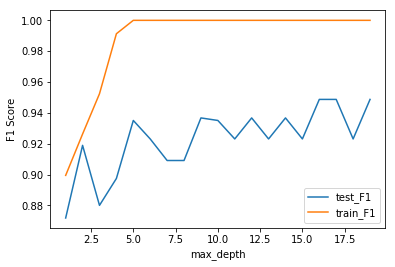

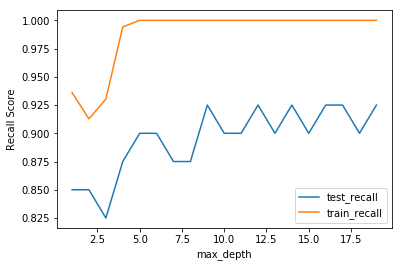

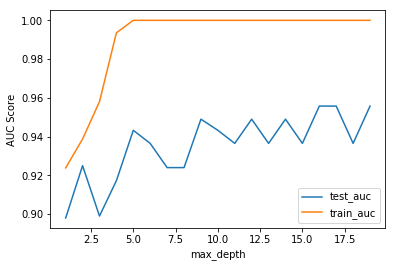

In [12]:
depth = list(range(1,20))
train_f1 = []
train_recall = []
train_auc =[]
test_f1 = []
test_recall =[]
test_auc = []

for i in depth:
    clf = tree.DecisionTreeClassifier(criterion='gini', max_depth = i)
    clf.fit(x_train_N,y_train)
    train_f1.append(f1_score(y_train, clf.predict(x_train_N)))
    train_recall.append(recall_score(y_train,clf.predict(x_train_N)))
    train_auc.append(roc_auc_score(y_train,clf.predict(x_train_N)))
    test_f1.append(f1_score(y_test, clf.predict(x_test_N)))
    test_recall.append(recall_score(y_test,clf.predict(x_test_N)))
    test_auc.append(roc_auc_score(y_test,clf.predict(x_test_N)))

# F1 Plot
plt.plot(depth, test_f1,label='test_F1')
plt.plot(depth, train_f1,label='train_F1')
plt.xlabel("max_depth")
plt.ylabel("F1 Score")
plt.legend()
plt.show()

# Recall Plot
plt.plot(depth, test_recall,label='test_recall')
plt.plot(depth, train_recall,label='train_recall')
plt.xlabel("max_depth")
plt.ylabel("Recall Score")
plt.legend()
plt.show()

#AUC Distribution Plot
plt.plot(depth, test_auc,label='test_auc')
plt.plot(depth, train_auc,label='train_auc')
plt.xlabel("max_depth")
plt.ylabel("AUC Score")
plt.legend()
plt.show()


looking at the plot depth = 6 seems to be giving highest scores based on above parameters. Now when we have the best paramters for the model; let's run it again with best possible hyperparameters.

In [14]:
clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=6, random_state=100)
clf.fit(x_train_N, y_train)
print('F1-Score ',f1_score(y_test, clf.predict(x_test_N)))
print('Accuracy ',accuracy_score(y_test, clf.predict(x_test_N)))
print('Recall ',recall_score(y_test, clf.predict(x_test_N)))
print('AUC ',roc_auc_score(y_test, clf.predict(x_test_N)))
print(confusion_matrix(y_test, clf.predict(x_test_N)))

F1-Score  0.935064935064935
Accuracy  0.956140350877193
Recall  0.9
AUC  0.9432432432432433
[[73  1]
 [ 4 36]]


Model performs well on the testing set and is able to predict 36 out of 40 cancer cases in the testing set. Also, AUC is around
0.94 which is also closer to 1.
Let's build the ROC, gain and liftCurves

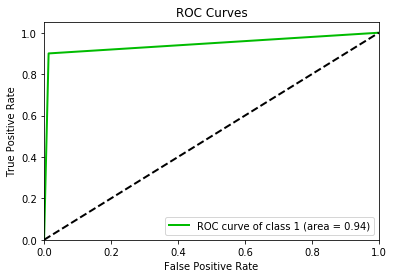

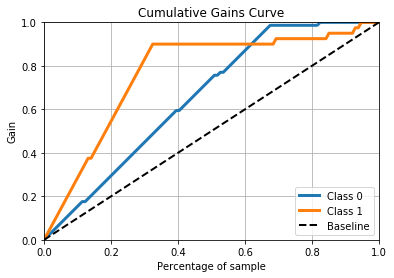

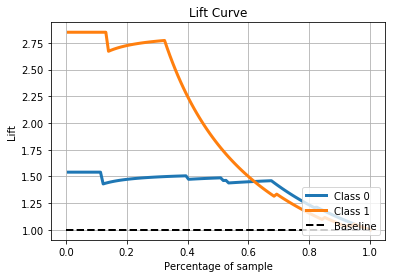

In [16]:
skplt.metrics.plot_roc(y_test, clf.predict_proba(x_test_N), plot_micro=False, plot_macro=False,classes_to_plot=[1])
skplt.metrics.plot_cumulative_gain(y_test, clf.predict_proba(x_test_N))
skplt.metrics.plot_lift_curve(y_test, clf.predict_proba(x_test_N))
plt.show()

In [18]:
# KNN Classifier

parameters = {'n_neighbors':list(range(2,10)), 'p':[1,2,3], 'weights':['uniform','distance']}
clf = KNeighborsClassifier()
scoring = ['recall', 'f1']
for score in scoring:
    print('Model Based on ', score)
    print('*'*100)
    
    grid_clf = GridSearchCV(clf, param_grid=parameters, cv=5, scoring = score)
    grid_clf.fit(x_train_N, y_train)
    print('Best Model with paramters is ')
    print(grid_clf.best_estimator_)
    mean_score = grid_clf.cv_results_['mean_test_score']
    std_score = grid_clf.cv_results_['std_test_score']
    print(score, ' score different hyperparamters')
    for m, s, p in zip(mean_score,std_score, grid_clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (m, s * 2, p))
    print()
    print('Lets the best model on testing set')
    print('*'*100)
    print(classification_report(y_test, grid_clf.best_estimator_.predict(x_test_N)))

Model Based on  recall
****************************************************************************************************
Best Model with paramters is 
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=1,
           weights='distance')
recall  score different hyperparamters
0.884 (+/-0.129) for {'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}
0.942 (+/-0.083) for {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
0.866 (+/-0.152) for {'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}
0.924 (+/-0.080) for {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
0.872 (+/-0.110) for {'n_neighbors': 2, 'p': 3, 'weights': 'uniform'}
0.930 (+/-0.071) for {'n_neighbors': 2, 'p': 3, 'weights': 'distance'}
0.947 (+/-0.101) for {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
0.947 (+/-0.101) for {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
0.948 (+/-0.106) for {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
0.948

Best models Recall rate on training set is 0.945.
Also checked for testing set F1 and Recall for best model which is 0.95 and 0.93 repectively.
Therefore, based on both f1 score and recall the best model found is with depth=4 and p=2 and let's fix 
p=2 and try to visualize hyperparamter tuning and evaluation on testing data

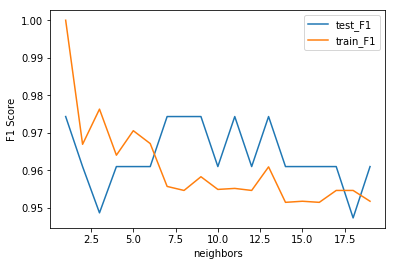

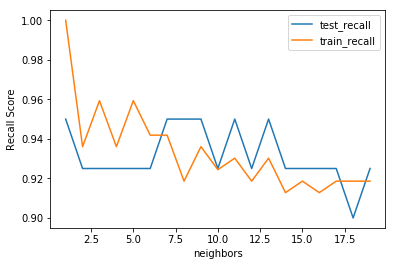

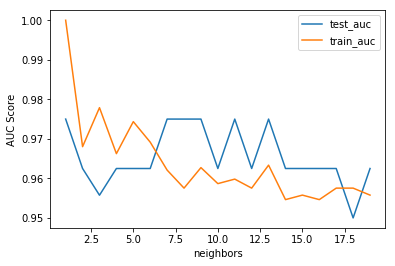

In [20]:
n_neighbors = list(range(1,20))
train_f1 = []
train_recall = []
train_auc =[]
test_f1 = []
test_recall =[]
test_auc = []

for i in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors = i, p = 2)
    clf.fit(x_train_N,y_train)
    train_f1.append(f1_score(y_train, clf.predict(x_train_N)))
    train_recall.append(recall_score(y_train,clf.predict(x_train_N)))
    train_auc.append(roc_auc_score(y_train,clf.predict(x_train_N)))
    test_f1.append(f1_score(y_test, clf.predict(x_test_N)))
    test_recall.append(recall_score(y_test,clf.predict(x_test_N)))
    test_auc.append(roc_auc_score(y_test,clf.predict(x_test_N)))

# F1 Plot
plt.plot(n_neighbors, test_f1,label='test_F1')
plt.plot(n_neighbors, train_f1,label='train_F1')
plt.xlabel("neighbors")
plt.ylabel("F1 Score")
plt.legend()
plt.show()

# Recall Plot
plt.plot(n_neighbors, test_recall,label='test_recall')
plt.plot(n_neighbors, train_recall,label='train_recall')
plt.xlabel("neighbors")
plt.ylabel("Recall Score")
plt.legend()
plt.show()

#AUC Distribution Plot
plt.plot(n_neighbors, test_auc,label='test_auc')
plt.plot(n_neighbors, train_auc,label='train_auc')
plt.xlabel("neighbors")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

For our case, since it is more important to predict all the cancer cases than giving out wrong predictions, we want the recall to be highest.
Therfore, we notice that the recall is highest when n_neighbors= 13

In [22]:
# Now when we know the best parameter
clf = KNeighborsClassifier(n_neighbors = 13, p = 2)
clf.fit(x_train_N, y_train)
print('F1-Score ',f1_score(y_test, clf.predict(x_test_N)))
print('Accuracy ',accuracy_score(y_test, clf.predict(x_test_N)))
print('Recall ',recall_score(y_test, clf.predict(x_test_N)))
print('AUC ',roc_auc_score(y_test, clf.predict(x_test_N)))
print(confusion_matrix(y_test, clf.predict(x_test_N)))

F1-Score  0.9743589743589743
Accuracy  0.9824561403508771
Recall  0.95
AUC  0.975
[[74  0]
 [ 2 38]]


Model performs well on the testing set and is able to predict 38 out of 40 cancer cases in the testing set. Also, AUC is around
0.97 which is also closer to 1 and better than decision tree.
Let's build the ROC, gain and liftCurves

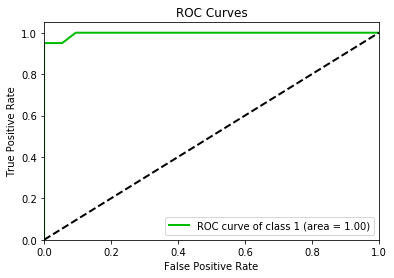

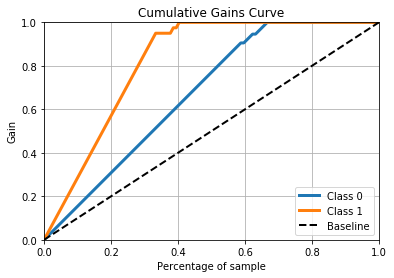

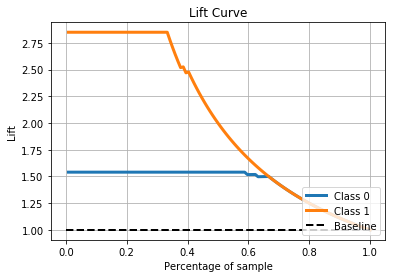

In [23]:

skplt.metrics.plot_roc(y_test, clf.predict_proba(x_test_N), plot_micro=False, plot_macro=False,classes_to_plot=[1])
skplt.metrics.plot_cumulative_gain(y_test, clf.predict_proba(x_test_N))
skplt.metrics.plot_lift_curve(y_test, clf.predict_proba(x_test_N))
plt.show()

In [30]:
#Logistics Classifier

parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty' : ['l1','l2']}
clf = linear_model.LogisticRegression(random_state=100)
scoring = ['recall', 'f1']
for score in scoring:
    print('Model Based on ', score)
    print('*'*100)
    
    grid_clf = GridSearchCV(clf, param_grid=parameters, cv=5, scoring = score)
    grid_clf.fit(x_train_N, y_train)
    print('Best Model with paramters is ')
    print(grid_clf.best_estimator_)
    mean_score = grid_clf.cv_results_['mean_test_score']
    std_score = grid_clf.cv_results_['std_test_score']
    print(score, ' score different hyperparamters')
    for m, s, p in zip(mean_score,std_score, grid_clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (m, s * 2, p))
    print()
    print('Lets the best model on testing set')
    print('*'*100)
    print(classification_report(y_test, grid_clf.best_estimator_.predict(x_test_N)))

Model Based on  recall
****************************************************************************************************
Best Model with paramters is 
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=100, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
recall  score different hyperparamters
0.000 (+/-0.000) for {'C': 0.001, 'penalty': 'l1'}
0.285 (+/-0.175) for {'C': 0.001, 'penalty': 'l2'}
0.000 (+/-0.000) for {'C': 0.01, 'penalty': 'l1'}
0.657 (+/-0.128) for {'C': 0.01, 'penalty': 'l2'}
0.820 (+/-0.058) for {'C': 0.1, 'penalty': 'l1'}
0.826 (+/-0.089) for {'C': 0.1, 'penalty': 'l2'}
0.942 (+/-0.081) for {'C': 1, 'penalty': 'l1'}
0.913 (+/-0.072) for {'C': 1, 'penalty': 'l2'}
0.965 (+/-0.024) for {'C': 10, 'penalty': 'l1'}
0.959 (+/-0.060) for {'C': 10, 'penalty': 'l2'}
0.953 (+/-0.060) for {'C': 100, 'penalty': 'l1'}
0.959 

Best Models Recall rate on training set is 0.965
Also checked for testing set Recall and F1 for best model which is 0.95 and 0.96 repectively.
Therefore, based on both f1 score and recall the best model found is with C=10 and l2norm regularization and let's fix 
l2norm regularization and try to visualize hyperparamter (C - extend of regularization) tuning and evaluation on testing data.

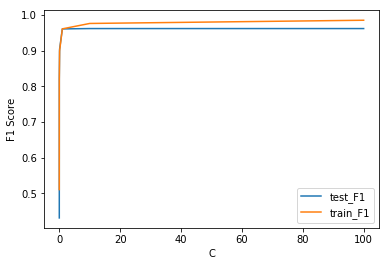

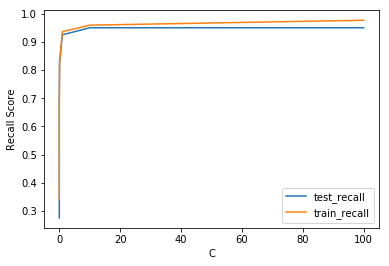

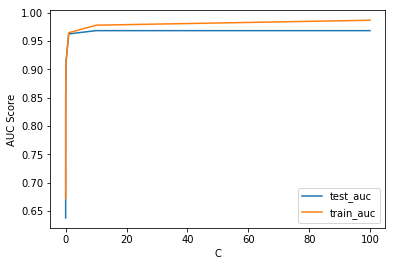

In [25]:
C = [0.001, 0.01, 0.1, 1, 10, 100]
train_f1 = []
train_recall = []
train_auc =[]
test_f1 = []
test_recall =[]
test_auc = []

for i in C:
    clf = linear_model.LogisticRegression(C= i, penalty = 'l2', random_state=100)
    clf.fit(x_train_N,y_train)
    train_f1.append(f1_score(y_train, clf.predict(x_train_N)))
    train_recall.append(recall_score(y_train,clf.predict(x_train_N)))
    train_auc.append(roc_auc_score(y_train,clf.predict(x_train_N)))
    test_f1.append(f1_score(y_test, clf.predict(x_test_N)))
    test_recall.append(recall_score(y_test,clf.predict(x_test_N)))
    test_auc.append(roc_auc_score(y_test,clf.predict(x_test_N)))

# F1 Plot
plt.plot(C, test_f1,label='test_F1')
plt.plot(C, train_f1,label='train_F1')
plt.xlabel("C")
plt.ylabel("F1 Score")
plt.legend()
plt.show()

# Recall Plot
plt.plot(C, test_recall,label='test_recall')
plt.plot(C, train_recall,label='train_recall')
plt.xlabel("C")
plt.ylabel("Recall Score")
plt.legend()
plt.show()

#AUC Distribution Plot
plt.plot(C, test_auc,label='test_auc')
plt.plot(C, train_auc,label='train_auc')
plt.xlabel("C")
plt.ylabel("AUC Score")
plt.legend()
plt.show()


For our case, since it is more important to predict all the cancer cases than giving out wrong predictions, we want the recall to be highest.
Therfore, we notice that the recall is highest when C=10

In [26]:
# Now when we know the best parameter
clf = linear_model.LogisticRegression(C= 10, penalty = 'l2', random_state=100)
clf.fit(x_train_N, y_train)
print('F1-Score ',f1_score(y_test, clf.predict(x_test_N)))
print('Accuracy ',accuracy_score(y_test, clf.predict(x_test_N)))
print('Recall ',recall_score(y_test, clf.predict(x_test_N)))
print('AUC ',roc_auc_score(y_test, clf.predict(x_test_N)))
print(confusion_matrix(y_test, clf.predict(x_test_N)))


F1-Score  0.9620253164556962
Accuracy  0.9736842105263158
Recall  0.95
AUC  0.9682432432432432
[[73  1]
 [ 2 38]]


Model performs well on the testing set and is able to predict 38 out of 40 cancer cases in the testing set. Also, AUC is around
0.968 which is also closer to 1 and more or less similar to KNN.
Let's build the ROC, gain and liftCurves

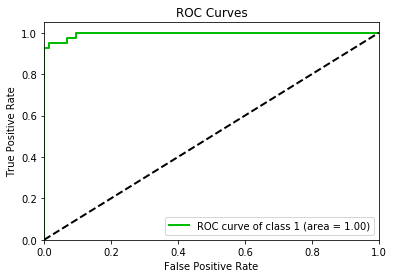

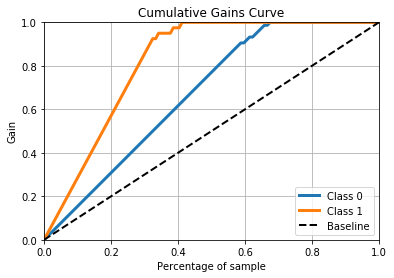

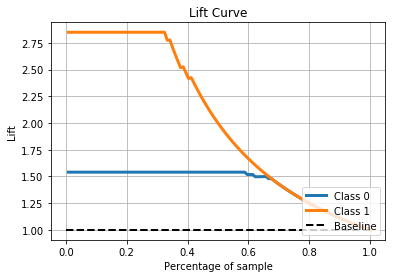

In [28]:
skplt.metrics.plot_roc(y_test, clf.predict_proba(x_test_N), plot_micro=False, plot_macro=False,classes_to_plot=[1])
skplt.metrics.plot_cumulative_gain(y_test, clf.predict_proba(x_test_N))
skplt.metrics.plot_lift_curve(y_test, clf.predict_proba(x_test_N))
plt.show()

In [31]:
# SVM Classifier

parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 10], 'gamma' : [0.001, 0.01, 0.1, 1],
              'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
clf = SVC(random_state=100)
scoring = ['recall', 'f1']
for score in scoring:
    print('Model Based on ', score)
    print('*'*100)
    
    grid_clf = GridSearchCV(clf, param_grid=parameters, cv=5, scoring = score)
    grid_clf.fit(x_train_N, y_train)
    print('Best Model with paramters is ')
    print(grid_clf.best_estimator_)
    mean_score = grid_clf.cv_results_['mean_test_score']
    std_score = grid_clf.cv_results_['std_test_score']
    print(score, ' score different hyperparamters')
    for m, s, p in zip(mean_score,std_score, grid_clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (m, s * 2, p))
    print('Lets the best model on testing set')
    print('*'*100)
    print(classification_report(y_test, grid_clf.best_estimator_.predict(x_test_N)))

Model Based on  recall
****************************************************************************************************
Best Model with paramters is 
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=100, shrinking=True,
  tol=0.001, verbose=False)
recall  score different hyperparamters
0.000 (+/-0.000) for {'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}
0.000 (+/-0.000) for {'C': 0.001, 'gamma': 0.001, 'kernel': 'poly'}
0.000 (+/-0.000) for {'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}
0.000 (+/-0.000) for {'C': 0.001, 'gamma': 0.001, 'kernel': 'sigmoid'}
0.000 (+/-0.000) for {'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}
0.000 (+/-0.000) for {'C': 0.001, 'gamma': 0.01, 'kernel': 'poly'}
0.000 (+/-0.000) for {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
0.000 (+/-0.000) for {'C': 0.001, 'gamma': 0.01, 'kernel': 'sigmoid'}
0.000 (+/-0.000) for {'C': 0.001, 'gamma'

Best models Recall rate on training set is 0.965.
Also checked for testing set F1 and Recall for best model which is 0.96 and 0.95 repectively.
Therefore, based on both f1 score and recall the best model found is with C=10 and 'rbg' kernel and let's fix the kernel and try to visualize hyperparamter tuning and evaluation on testing data.

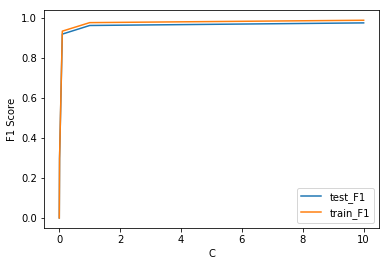

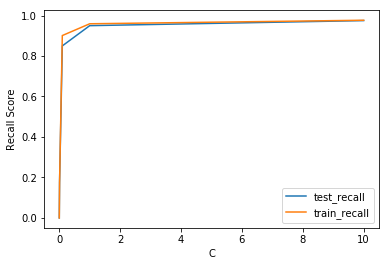

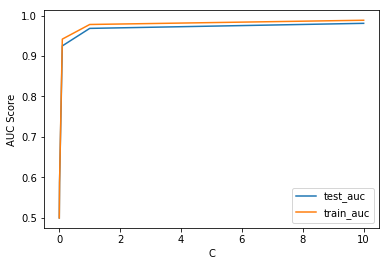

In [32]:
C = [0.001, 0.01, 0.1, 1, 10]
train_f1 = []
train_recall = []
train_auc =[]
test_f1 = []
test_recall =[]
test_auc = []

for i in C:
    clf = SVC(C= i, kernel = 'rbf', gamma = 1, random_state=100)
    clf.fit(x_train_N,y_train)
    train_f1.append(f1_score(y_train, clf.predict(x_train_N)))
    train_recall.append(recall_score(y_train,clf.predict(x_train_N)))
    train_auc.append(roc_auc_score(y_train,clf.predict(x_train_N)))
    test_f1.append(f1_score(y_test, clf.predict(x_test_N)))
    test_recall.append(recall_score(y_test,clf.predict(x_test_N)))
    test_auc.append(roc_auc_score(y_test,clf.predict(x_test_N)))

# F1 Plot
plt.plot(C, test_f1,label='test_F1')
plt.plot(C, train_f1,label='train_F1')
plt.xlabel("C")
plt.ylabel("F1 Score")
plt.legend()
plt.show()

# Recall Plot
plt.plot(C, test_recall,label='test_recall')
plt.plot(C, train_recall,label='train_recall')
plt.xlabel("C")
plt.ylabel("Recall Score")
plt.legend()
plt.show()

#AUC Distribution Plot
plt.plot(C, test_auc,label='test_auc')
plt.plot(C, train_auc,label='train_auc')
plt.xlabel("C")
plt.ylabel("AUC Score")
plt.legend()
plt.show()


For our case, since it is more important to predict all the cancer cases than giving out wrong predictions, we want the recall to be highest.
Therfore, we notice that the recall is highest when C=10

In [ ]:
# Now when we know the best parameter
clf = SVC(C= 10, kernel = 'rbf', gamma = 1, random_state=100,probability=True)
clf.fit(x_train_N, y_train)
print('F1-Score ',f1_score(y_test, clf.predict(x_test_N)))
print('Accuracy ',accuracy_score(y_test, clf.predict(x_test_N)))
print('Recall ',recall_score(y_test, clf.predict(x_test_N)))
print('AUC ',roc_auc_score(y_test, clf.predict(x_test_N)))
print(confusion_matrix(y_test, clf.predict(x_test_N)))

Model performs well on the testing set and is able to predict 39 out of 40 cancer cases in the testing set. Also, AUC is around
0.98 which is also closer to 1 and is best among all the previous models.
Let's build the ROC, gain and liftCurves

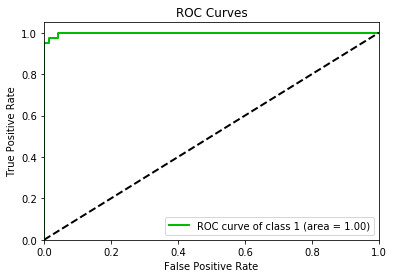

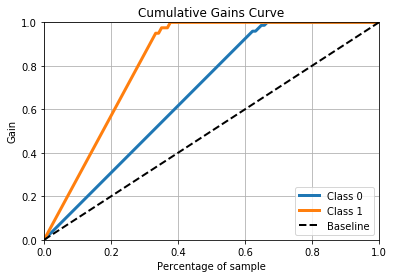

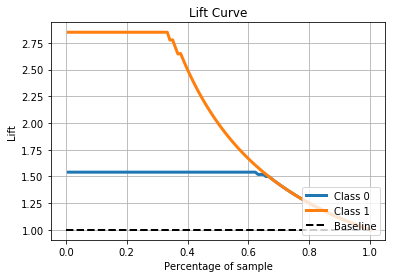

In [36]:
skplt.metrics.plot_roc(y_test, clf.predict_proba(x_test_N), plot_micro=False, plot_macro=False,classes_to_plot=[1])
skplt.metrics.plot_cumulative_gain(y_test, clf.predict_proba(x_test_N))
skplt.metrics.plot_lift_curve(y_test, clf.predict_proba(x_test_N))
plt.show()